# Chapter 10: 時系列分析

## レシピ
* [Pythonとpandasの日付ツールの違いを理解](#レシピ82-Pythonとpandasの日付ツールの違いを理解)
* [時系列を賢くスライシング](#レシピ83-時系列を賢くスライシング)
* [Datetimeindexでだけ働くメソッドを使う](#レシピ84-Datetimeindexでだけ働くメソッドを使う)
* [週ごとの犯罪件数](#レシピ85-週ごとの犯罪件数)
* [週ごとの犯罪と交通事故を個別に集約](#レシピ86-週ごとの犯罪と交通事故を個別に集約)
* [曜日と年での犯罪件数の測定](#レシピ87-曜日と年での犯罪件数の測定)
* [DatetimeIndexで無名関数を使いグループ分け](#レシピ88-DatetimeIndexで無名関数を使いグループ分け)
* [Timestampと別のカラムでグループ分け](#レシピ89-Timestampと別のカラムでグループ分け)
* [merge_asofで犯罪率が20%低かったのは最近ではいつかを見つける](#レシピ90-merge_asofで犯罪率が20%低かったのは最近ではいつかを見つける)

In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

# レシピ82 Pythonとpandasの日付ツールの違いを理解

In [2]:
# datetimeモジュールから、date,time, datetimeオブジェクトを作る
import datetime

date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30,
                    second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7,
                      hour=12, minute=30, second=19,
                      microsecond=463198)

print('date is', date)
print('time is', time)
print('datetime is', dt)

date is 2013-06-07
time is 12:30:19.463198
datetime is 2013-06-07 12:30:19.463198


In [3]:
# timedeltaオブジェクトを作る
td = datetime.timedelta(weeks=2, days=5, hours=10,
                       minutes=20, seconds=6.73,
                       milliseconds=99, microseconds=8)
print(td)

19 days, 10:20:06.829008


In [4]:
# dateとdatetimeオブジェクトにtimedeltaを加える
print('new date is', date + td)
print('new datetime is', dt + td)

new date is 2013-06-26
new datetime is 2013-06-26 22:50:26.292206


In [7]:
# timeオブジェクトにtimedeltaは加える事ができない
time + td

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

In [5]:
# pandasのTimestampオブジェクトを作成する
pd.Timestamp(year=2012, month=12, day=21, hour=5,
            minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [6]:
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [7]:
pd.Timestamp('2015-5/10')

Timestamp('2015-05-10 00:00:00')

In [8]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [9]:
pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

In [10]:
# Unix紀元(1970年1月1日)からの経過時間(デフォルトは秒)を返すこともできる
pd.Timestamp(500)

Timestamp('1970-01-01 00:00:00.000000500')

In [11]:
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

In [12]:
# pandasのto_datetime関数で文字列をTimestampオブジェクトに変換出来る
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [16]:
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [18]:
pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',
              format='Start Date: %b %d, %Y Start Time: %I:%M %p')

Timestamp('2017-09-30 13:30:00')

In [19]:
pd.to_datetime(100, unit='D', origin = '2013-1-1')

Timestamp('2013-04-11 00:00:00')

In [20]:
# 文字列又は整数のリスト又はSeries全体をTimestampに変換する
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [22]:
s = pd.Series(['12-5-2015', '14-1-2013',
              '20/12/2017', '40/23/2017'])
pd.to_datetime(s, dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [23]:
pd.to_datetime(['Aug 3 1999 3:45:56', '10/31/2017'])

DatetimeIndex(['1999-08-03 03:45:56', '2017-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)

In [13]:
# pandasのTimedeltaとto_timedeltaを使う

pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456')

In [15]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [16]:
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [17]:
pd.Timedelta('67:15:45.454000')

Timedelta('2 days 19:15:45.454000')

In [19]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

In [20]:
time_strings = ['2 days 24 minutes 89.67 seconds', '00:45:23.6']
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [21]:
# Timedeltaは加減算が出来る
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [22]:
pd.Timestamp('1/1/2017') + \
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timestamp('2017-01-25 10:06:00')

In [23]:
td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2

TimedeltaIndex(['03:00:10', '04:01:40'], dtype='timedelta64[ns]', freq=None)

In [24]:
pd.Timedelta('12 days') / pd.Timedelta('3 days')

4.0

In [26]:
# TimedeltaとTimestampの属性やメソッドについて
ts = pd.Timestamp('2016-10-1 4:23:23.9')
ts

Timestamp('2016-10-01 04:23:23.900000')

In [27]:
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [28]:
ts.year, ts.month, ts.hour, ts.minute, ts.second

(2016, 10, 4, 23, 23)

In [30]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [31]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [32]:
td = pd.Timedelta(125.8623, unit='h')
td

Timedelta('5 days 05:51:44.280000')

In [33]:
td.round('min')

Timedelta('5 days 05:52:00')

In [34]:
td.components

Components(days=5, hours=5, minutes=51, seconds=44, milliseconds=280, microseconds=0, nanoseconds=0)

In [35]:
td.total_seconds()

453104.28

In [36]:
# 日付書式指定をした方が早い
date_string_list = ['Sep 20 1984'] * 10000

In [43]:
%timeit pd.to_datetime(date_string_list, format='%b %d %Y')

2.51 ms ± 27.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
%timeit pd.to_datetime(date_string_list)

2.61 ms ± 35.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# レシピ83 時系列を賢くスライシング

In [45]:
# DenverのcrimeデータセットをHDF5形式のcrime.h5から読み込む
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [46]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [47]:
# .locインデクサにインデックスの値を渡す
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [48]:
# インデックスがTimestampなら部分マッチングする行をすべて選ぶことが出来る
crime.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,NaN,NaN,harvey-park-south,1,0


In [49]:
# １つの日付だけでなく、月、年、時間でも選択可能
crime.loc['2016-05'].shape

(8012, 7)

In [50]:
crime.loc['2016'].shape

(91076, 7)

In [51]:
crime.loc['2016-05-12 03'].shape

(4, 7)

In [54]:
# 選択文字列は月の英字名でもよい
crime.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [55]:
# 月の形式には様々なパターンがある
crime.loc['2016 Sep, 15'].shape

(252, 7)

In [56]:
crime.loc['21st October 2014 05'].shape

(4, 7)

In [57]:
# スライス表記を使って、データ範囲を指定可能
crime.loc['2015-3-4':'2016-1-1'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0


In [58]:
# スライスの開始もしくは終了に必要なだけの精度をつけれる
crime.loc['2015-3-4 22': '2016-1-1 11:45:00'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.979180,39.706613,washington-park-west,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,-104.991655,39.740067,civic-center,0,1
2015-03-04 22:36:00,theft-unauth-use-of-ftd,white-collar-crime,-105.045235,39.667928,harvey-park,1,0
...,...,...,...,...,...,...,...
2016-01-01 11:10:00,theft-of-motor-vehicle,auto-theft,-104.819450,39.791615,montbello,1,0
2016-01-01 11:11:00,traffic-accident,traffic-accident,-104.981701,39.736814,capitol-hill,0,1
2016-01-01 11:11:00,traffic-accident-hit-and-run,traffic-accident,-104.973731,39.714223,speer,0,1


In [59]:
# 型違いによるメモリ使用量の比較
mem_cat = crime.memory_usage().sum()
mem_obj = crime.astype({'OFFENSE_TYPE_ID':'object', 
                        'OFFENSE_CATEGORY_ID':'object', 
                        'NEIGHBORHOOD_ID':'object'}).memory_usage(deep=True)\
                                                    .sum()
mb = 2 ** 20
round(mem_cat / mb, 1), round(mem_obj / mb, 1)

(29.4, 122.7)

In [60]:
# sortしたDataFrameの方がスライシングが早い
%timeit crime.loc['2015-3-4': '2016-1-1']

6.22 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
crime_sort = crime.sort_index()
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

685 µs ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# レシピ84 DatetimeIndexでだけ働くメソッドを使う

In [64]:
# crimeデータセットを読み込み、REPORTED_DATEカラムをインデックスにする
crime = pd.read_hdf('data/crime.h5', 'crime').set_index('REPORTED_DATE')
print(type(crime.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [65]:
# between_timeメソッドを使い、午後2時から5時までに発生した全犯罪を選択
crime.between_time('2:00', '5:00', include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [66]:
# at_timeで指定した時刻の日付全てを選ぶ
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [68]:
# 時間セグメントを使って、先頭6か月を選ぶ
# indexの時間成分の先頭要素を使っているので、この例だと6か月+6分となる
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [69]:
# この例だと6月30日から+6分のデータとなる
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-29 23:01:00,aggravated-assault,aggravated-assault,-105.019673,39.733250,sun-valley,1,0
2012-06-29 23:11:00,traffic-accident,traffic-accident,-104.918451,39.653080,southmoor-park,0,1
2012-06-29 23:41:00,robbery-street,robbery,-104.991912,39.756163,five-points,1,0


In [71]:
# normalizeパラメータをTrueにすると上記問題が解決
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [72]:
# 簡単なスライシングの方が正確な結果が得られる
crime_sort.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [73]:
# オフセットエリアスを使う

# 5日
crime_sort.first('5D')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-06 23:11:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.999752,39.726081,lincoln-park,1,0
2012-01-06 23:23:00,violation-of-restraining-order,all-other-crimes,-104.969588,39.681135,university,1,0
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0


In [74]:
# 5勤務
crime_sort.first('5B')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-08 23:46:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.991384,39.753888,five-points,1,0
2012-01-08 23:51:00,burglary-residence-no-force,burglary,-105.031781,39.747420,sloan-lake,1,0
2012-01-08 23:52:00,theft-other,larceny,-104.968227,39.739752,cheesman-park,1,0


In [75]:
# 7週、週末は日曜
crime_sort.first('7w')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-02-18 21:57:00,traffic-accident,traffic-accident,-104.974663,39.744041,north-capitol-hill,0,1
2012-02-18 22:19:00,criminal-mischief-graffiti,public-disorder,-104.957558,39.766129,clayton,1,0
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,-104.919946,39.761917,north-park-hill,0,1


In [76]:
# 第2四半期の開始
crime_sort.first('3QS')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-09-30 23:17:00,drug-hallucinogen-possess,drug-alcohol,-105.022715,39.678579,college-view-south-platte,1,0
2012-09-30 23:29:00,robbery-street,robbery,-104.977522,39.781310,globeville,1,0
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,-104.988838,39.686925,overland,1,0


In [77]:
# 1年の終わり
crime_sort.first('A')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-12-30 23:13:00,traffic-accident,traffic-accident,-104.973097,39.740032,capitol-hill,0,1
2012-12-30 23:14:00,burglary-residence-no-force,burglary,-104.960898,39.697153,washington-park,1,0
2012-12-30 23:39:00,theft-of-motor-vehicle,auto-theft,-105.002180,39.769714,sunnyside,1,0


# レシピ85 週ごとの犯罪係数

#### resampleとgroupbyメソッドを使い週ごとの犯罪件数を数える

In [80]:
# crimeデータセットを読み込み、REPORTED_DATEカラムをインデックスにする
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
               .set_index('REPORTED_DATE') \
               .sort_index()

In [82]:
# resampleメソッドを使う
crime_sort.resample('W')

In [84]:
# sizeメソッドをチェイニングして犯罪件数を数える
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [85]:
# resampleメソッドの結果を確認する
len(crime_sort.loc[:'2012-1-8'])

877

In [86]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])

1071

In [87]:
# アンカーオフセットを使い、日曜以外で週を終わるようにする
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

In [89]:
# resampleをgroupbyでも可能。オフセットをpd.Grouperオブジェクトで渡す必要がある
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size()
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [92]:
# resampleオブジェクトのメソッドを調べる
r = crime_sort.resample('W')
resample_methods = [attr for attr in dir(r) if attr[0].islower()]
print(resample_methods)

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'nearest', 'ngroups', 'nunique', 'obj', 'ohlc', 'pad', 'pipe', 'plot', 'prod', 'quantile', 'sem', 'size', 'std', 'sum', 'transform', 'var']


In [93]:
# インデックスにTimestampがなくてもresampleを使える。onパラメータでTimestampのあるカラムを選ぶ
crime = pd.read_hdf('data/crime.h5', 'crime')
weekly_crimes2 = crime.resample('W', on='REPORTED_DATE').size()
weekly_crimes2.equals(weekly_crimes)

True

In [95]:
# gorupbyの場合はkeyパラメータでTimestampカラムを選ぶ
weekly_crimes_gby2 = crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size()
weekly_crimes_gby2.equals(weekly_crimes_gby)

True

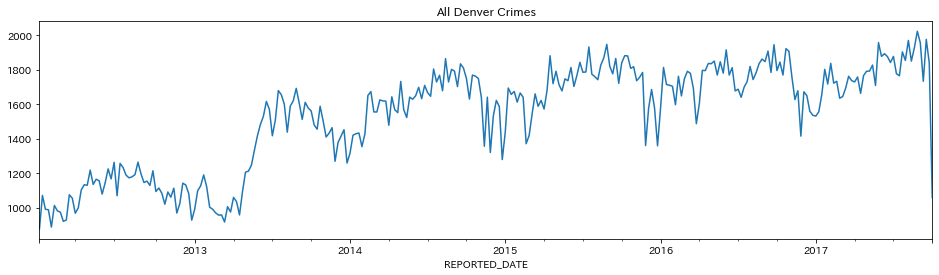

In [97]:
# 週次犯罪件数の線プロット
weekly_crimes.plot(figsize=(16,4), title='All Denver Crimes');

# レシピ86 週ごとの犯罪と交通事故を別々に集約

#### resampleメソッドで四半期のグループ分けをして犯罪と交通事故を別々に数える

In [2]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime')\
                .set_index('REPORTED_DATE')\
                .sort_index()

In [4]:
# 四半期のグループ分けをして各グループのIS_CRIMEとIS_TRAFFICカラムの和を別々にとる
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [5]:
# オフセットQSを使い、四半期初日にする
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [6]:
# 結果を第2四半期データが正しいかどうか検証する
crime_sort.loc['2012-4-1': '2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [8]:
# groupbyメソッドを使い同じ結果を得る
crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q'))\
                                ['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly2.equals(crime_quarterly)

True

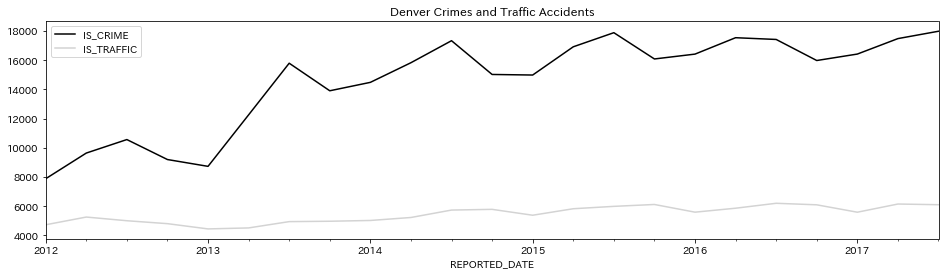

In [10]:
# プロットする
plot_kwargs = dict(figsize=(16,4), color=['black', 'lightgrey'],
                  title='Denver Crimes and Traffic Accidents')
crime_quarterly.plot(**plot_kwargs)


# レシピ87 曜日と年での犯罪件数の測定

In [2]:
# REPORTED_DATEをカラムのままにする
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [3]:
# Timestampカラムでdtアクセサを使い、曜日を見つけて数える
wd_counts = crime['REPORTED_DATE'].dt.weekday_name.value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

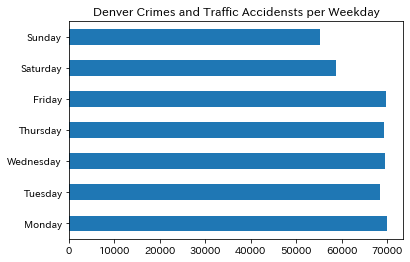

In [4]:
# データを整理して棒グラフにする
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidensts per Weekday'
wd_counts.reindex(days).plot(kind='barh',  title=title)

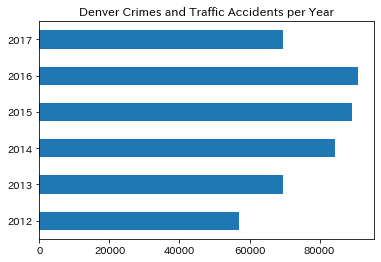

In [5]:
# 年ごとの件数を数える
title = 'Denver Crimes and Traffic Accidents per Year'
crime['REPORTED_DATE'].dt.year.value_counts()\
                                .sort_index()\
                                .plot(kind='barh', title=title)

In [6]:
# 曜日と年の両方でグループ分けしたい
weekday = crime['REPORTED_DATE'].dt.weekday_name
year = crime['REPORTED_DATE'].dt.year

crime_wd_y = crime.groupby([year, weekday]).size()
crime_wd_y.head(10)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
dtype: int64

In [7]:
# indexレベルの名前を変えて、曜日レベルでunstackする
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday'])\
                        .unstack('Weekday')
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [8]:
# 2017年のデータ最終日を見つける
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [9]:
# 過去データから最初の272日の犯罪発生の平均をもとめる
round(272 / 365, 3)

0.745

In [10]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272)\
                                  .groupby(year).mean().round(3)
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [11]:
crime_pct.loc[2012:2016].median()

0.748

In [12]:
# 2017年の行の値を更新し、カラムの順番を曜日の順番に合わせる
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int')
crime_table = crime_table.reindex(columns=days)
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


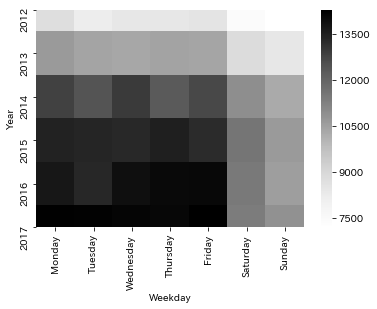

In [13]:
# ヒートマップで確認する
import seaborn as sns
sns.heatmap(crime_table, cmap='Greys')

In [14]:
# Denverの人口を該当する年についてテーブルに読み込む
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [16]:
# 人口を10万で割り、元の犯罪件数をこの数値で割って10万人当たりの発生率を得る
den_100k = denver_pop.div(100000).squeeze()
crime_table2 = crime_table.div(den_100k, axis='index').astype('int')
crime_table2

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


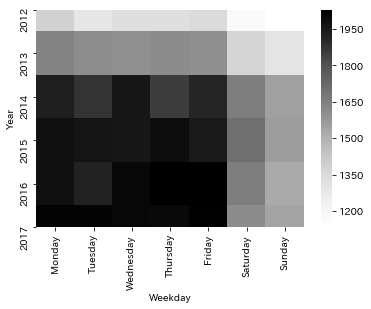

In [18]:
#再度、このデータでヒートマップをとる
sns.heatmap(crime_table2, cmap='Greys');

In [19]:
# 特定の犯罪を選ぶ能力を追加した関数

ADJ_2017 = .748
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def count_crime(df, offense_cat):
    df = df[df['OFFENSE_CATEGORY_ID'] == offense_cat]
    weekday = df['REPORTED_DATE'].dt.weekday_name
    year = df['REPORTED_DATE'].dt.year
    ct = df.groupby([year, weekday]).size().unstack()
    ct.loc[2017] = ct.loc[2017].div(ADJ_2017).astype('int')
    pop = pd.read_csv('data/denver_pop.csv', index_col='Year')
    pop = pop.squeeze().div(100000)
    ct = ct.div(pop, axis=0).astype('int')
    ct = ct.reindex(columns=days)
    sns.heatmap(ct, cmap='Greys')
    return ct

REPORTED_DATE,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


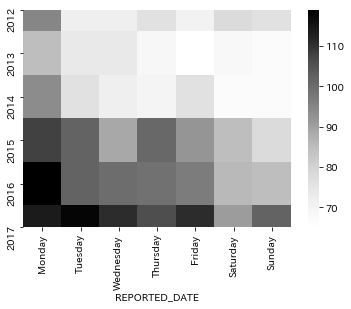

In [20]:
count_crime(crime, 'auto-theft')

# レシピ88 DatetimeIndexで無名関数を使いグループ分け

#### DatetimeIndexをもつDataFrameでgroupbyメソッドを使った多機能性を示す

In [2]:
# データを読み込む
crime_sort = pd.read_hdf('data/crime.h5', 'crime')\
                .set_index('REPORTED_DATE')\
                .sort_index()

In [3]:
# DatetimeIndexとpandas Timestampと同じ属性・メソッドを確認する
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))
print([attr for attr in common_attrs if attr[0] !='_'])

['tz_convert', 'timetz', 'second', 'resolution', 'is_year_end', 'is_leap_year', 'nanosecond', 'is_month_end', 'hour', 'time', 'dayofyear', 'date', 'dayofweek', 'year', 'day', 'strftime', 'floor', 'tz', 'to_period', 'min', 'month_name', 'tzinfo', 'round', 'minute', 'day_name', 'to_pydatetime', 'freqstr', 'weekday_name', 'quarter', 'daysinmonth', 'week', 'month', 'normalize', 'weekday', 'tz_localize', 'is_month_start', 'ceil', 'is_year_start', 'weekofyear', 'freq', 'to_numpy', 'days_in_month', 'max', 'is_quarter_end', 'microsecond', 'to_julian_date', 'is_quarter_start']


In [4]:
# インデックスを使って曜日名を見つける
crime_sort.index.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [6]:
# groupbyメソッドで関数を使うと、関数がインデックスに渡され、戻り値を使ってグループができる
crime_sort.groupby(lambda x: x.weekday_name)['IS_CRIME','IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [7]:
# 関数のリストで渡し、時間帯と年の両方でグループ分けする
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]
cr_group = crime_sort.groupby(funcs)['IS_CRIME', 'IS_TRAFFIC'].sum()

In [15]:
cr_final = cr_group.unstack()
cr_final.style.highlight_max(color='blue')

In [18]:
# xsメソッドを使い、単一値を選択する
cr_final.xs('IS_TRAFFIC', axis='columns', level=0).head()

,2012,2013,2014,2015,2016,2017
0,919,792,978,1136,980,782
2,718,652,779,773,718,537
4,399,378,424,471,464,313
6,411,399,479,494,593,462
8,1957,1955,2210,2331,2372,1828


In [19]:
# 値の位置指定にaxisとlevelパラメータが必要
cr_final.xs(2016, axis='columns', level=1).head()

,IS_CRIME,IS_TRAFFIC
0,5377,980
2,4091,718
4,3044,464
6,2108,593
8,4488,2372


# レシピ89 Timestampと別のカラムでグループ分け

In [3]:
# emplyeeデータセットを読み込む
employee = pd.read_csv('data/employee.csv',
                     parse_dates=['JOB_DATE', 'HIRE_DATE'],
                     index_col='HIRE_DATE')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [5]:
# 性別でグループ分けしてそれぞれの平均給与を求める
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [6]:
# 雇用日に基づいた平均給与を求め、10年のビンでグループ分けする
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [13]:
# 性別と5年期間ごとにグループ分けをする
sal_avg = employee.groupby('GENDER').resample('10AS')['BASE_SALARY'].mean().round(-2)
sal_avg

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [14]:
# 性別レベルをunstackする
sal_avg.unstack('GENDER')

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
1978-01-01,NaN,72300.0
1985-01-01,57600.0,NaN
1988-01-01,NaN,64600.0
1995-01-01,55500.0,NaN
1998-01-01,NaN,59700.0
2005-01-01,51700.0,NaN


In [15]:
# 男性の雇用年と女性の雇用年の最初を調べる
employee[employee['GENDER'] == 'Male'].index.min()

Timestamp('1958-12-29 00:00:00')

In [17]:
employee[employee['GENDER'] == 'Female'].index.min()

Timestamp('1975-06-09 00:00:00')

In [20]:
# 両性を合わせて日付でグループ分けする
sal_avg2 = employee.groupby(['GENDER', pd.Grouper(freq='10AS')])\
                    ['BASE_SALARY'].mean().round(-2)
sal_avg2

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [31]:
sal_final = sal_avg2.unstack('GENDER')
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


In [34]:
# 期間の開始終了を示す
years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + '-' + years_right.astype(str)
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-1967,NaN,81200.0
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0


In [35]:
# cut関数を使って各従業員が雇用された等幅期間を作成し、そこからグループ分けをする
cuts = pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

IntervalArray([(1958.0, 1970.0], (1970.0, 1981.0], (1981.0, 1993.0], (1993.0, 2004.0], (2004.0, 2016.0]],
              closed='right',
              dtype='interval[float64]')

In [36]:
employee.groupby([cuts, 'GENDER'])['BASE_SALARY']\
        .mean().unstack('GENDER').round(-2)

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0


# レシピ90 merge_asofで犯罪率が20%低かったのは最近ではいつかを見つける

#### 現在の月の犯罪件数を種別ごとに求め、件数が20％少なかったのは最近ではいつかを求める

In [37]:
# Denver crimeデータセットを読み込む
crime_sort = pd.read_hdf('data/crime.h5', 'crime')\
                .set_index('REPORTED_DATE')\
                .sort_index()

In [38]:
# 直近1か月分のデータを見つける
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

In [39]:
# 9月のデータを削除する
crime_sort = crime_sort[:'2017-8']
crime_sort.index.max()

Timestamp('2017-08-31 23:52:00')

In [41]:
# 犯罪と交通事故の件数をすべての月で数える
all_data = crime_sort.groupby([pd.Grouper(freq='M'),
                              'OFFENSE_CATEGORY_ID']).size()
all_data.head()

REPORTED_DATE  OFFENSE_CATEGORY_ID
2012-01-31     aggravated-assault     113
               all-other-crimes       124
               arson                    5
               auto-theft             275
               burglary               343
dtype: int64

In [43]:
all_data = all_data.sort_values().reset_index(name='Total')
all_data.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2014-12-31,murder,1
1,2013-01-31,arson,1
2,2016-05-31,murder,1
3,2012-12-31,murder,1
4,2016-12-31,murder,1


In [53]:
# 今月の犯罪数を取得して、目標を表すカラムを作る
goal = all_data[all_data['REPORTED_DATE'] == '2017-8-31']\
        .reset_index(drop=True)
goal['Total_Goal'] = goal['Total'].mul(.8).astype('int64')
goal.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
0,2017-08-31,murder,7,5
1,2017-08-31,arson,7,5
2,2017-08-31,sexual-assault,57,45
3,2017-08-31,robbery,108,86
4,2017-08-31,white-collar-crime,138,110


In [55]:
# merge_asof関数を使い、カテゴリごとに月の総犯罪件数がTotal_Goalカラムより低かった最後はいつか見つける
pd.merge_asof(goal, all_data, left_on ='Total_Goal',right_on='Total',
              by='OFFENSE_CATEGORY_ID',suffixes=('_Current', '_Last'))    

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08-31,murder,7,5,2017-01-31,5
1,2017-08-31,arson,7,5,2012-01-31,5
2,2017-08-31,sexual-assault,57,45,2013-01-31,45
3,2017-08-31,robbery,108,86,2015-03-31,86
4,2017-08-31,white-collar-crime,138,110,2016-10-31,110
5,2017-08-31,aggravated-assault,195,156,2016-05-31,154
6,2017-08-31,other-crimes-against-persons,376,300,2014-04-30,285
7,2017-08-31,burglary,432,345,2012-01-31,343
8,2017-08-31,auto-theft,599,479,2017-07-31,477
9,2017-08-31,drug-alcohol,636,508,2015-05-31,505


In [56]:
# pandasはPeriod型で時間を正確に表す
pd.Period(year=2012, month=5, day=17, hour=14, minute=20, freq='T')

Period('2012-05-17 14:20', 'T')

In [60]:
ad_period = crime_sort.groupby([lambda x: x.to_period('M'),
                               'OFFENSE_CATEGORY_ID']).size()
ad_period = ad_period.sort_values()\
                     .reset_index(name='Total')\
                     .rename(columns={'level_0': 'REPORTED_DATE'})
ad_period.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2014-12,murder,1
1,2013-01,arson,1
2,2016-05,murder,1
3,2012-12,murder,1
4,2016-12,murder,1


In [61]:
cols = ['OFFENSE_CATEGORY_ID', 'Total']
all_data[cols].equals(ad_period[cols])

True

In [62]:
aug_2018 = pd.Period('2017-8', freq='M')
goal_period = ad_period[ad_period['REPORTED_DATE'] == aug_2018].reset_index(drop=True)
goal_period['Total_Goal'] = goal_period['Total'].mul(.8).astype('int64')
pd.merge_asof(goal_period, ad_period, left_on='Total_Goal',
             right_on='Total', by='OFFENSE_CATEGORY_ID',
             suffixes=('_Current', '_Last')).head()

,REPORTED_DATE_Current,OFFENSE_CATEGORY_ID,Total_Current,Total_Goal,REPORTED_DATE_Last,Total_Last
0,2017-08,murder,7,5,2017-01,5
1,2017-08,arson,7,5,2012-01,5
2,2017-08,sexual-assault,57,45,2013-01,45
3,2017-08,robbery,108,86,2015-03,86
4,2017-08,white-collar-crime,138,110,2016-10,110
